<h1>Chennai House Price Prediction </h1>

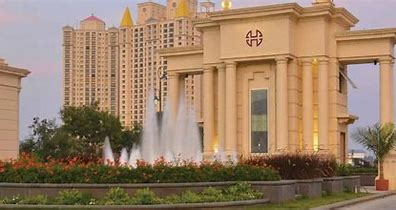

In [1]:
from IPython.display import Image
Image("/kaggle/input/chennai-image/chennai.jpeg")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/chennai-housing-sales-price/Chennai houseing sale.csv")


In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
## Remove null values
df = df.dropna()

In [8]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


**Removing The Masked Data**

In [9]:
df = df.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [10]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

<h3 style="display:inline">Data Cleaning Process</h1>
<h3 style="display:block">Removing the Repeated Areas<h3>

In [11]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar',
        'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar','Adayar':'Adyar'}
df.AREA = df.AREA.replace(area)

In [12]:
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: count, dtype: int64

In [13]:
name = {'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE'] = df['BUILDTYPE'].replace(name)

**EDA (Exploratory Data Analysis)**

Text(0, 0.5, 'Sales Price')

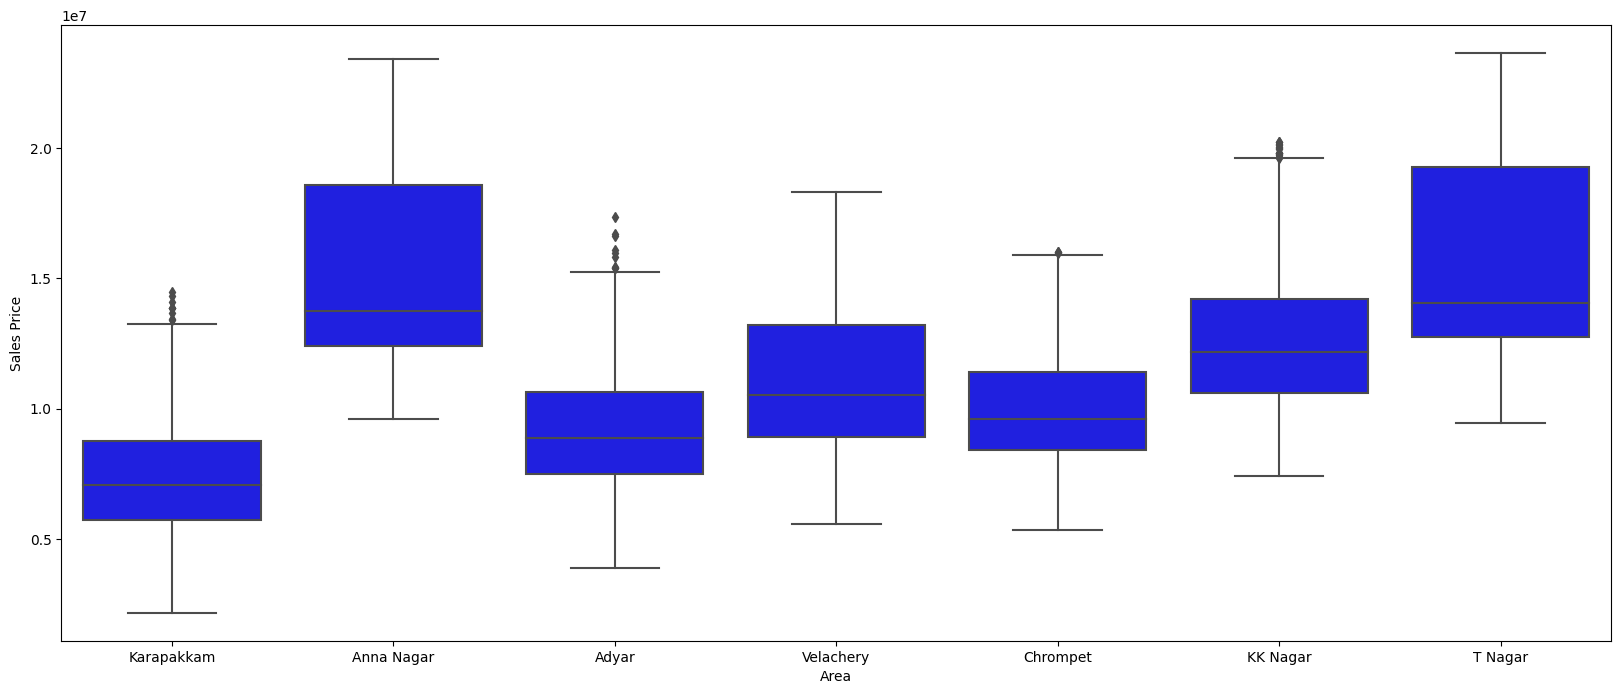

In [14]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
plt.figure(figsize=(20,8))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Area")
plt.ylabel("Sales Price")

<p> The Sales price of houses in T Nagar is the highest </p>

Text(0, 0.5, 'Sales Price')

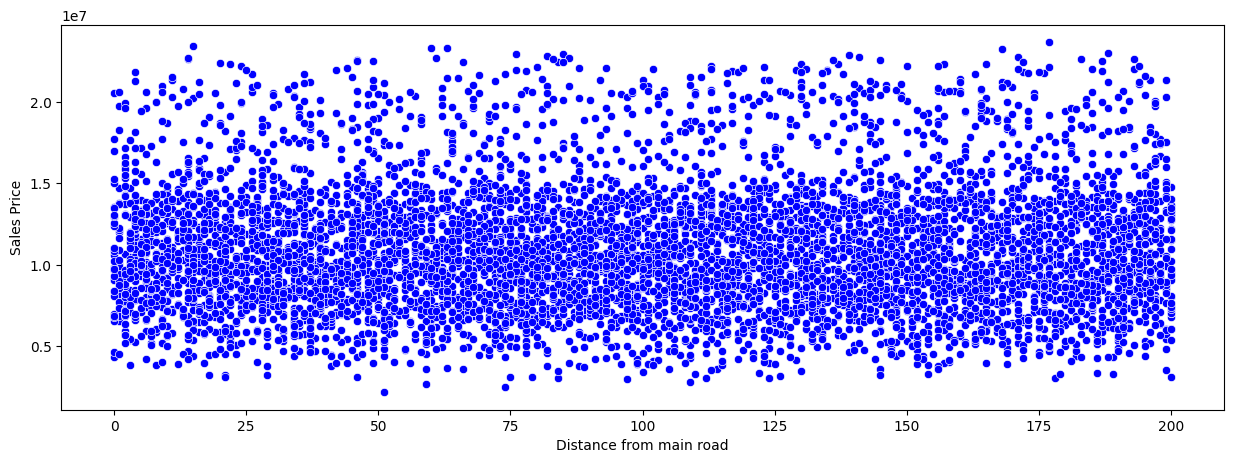

In [15]:
from matplotlib.figure import Figure
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['DIST_MAINROAD'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Distance from main road")
plt.ylabel("Sales Price")

<p>We can clearly infer that the distance from the main road does not affect our sales price. </p>

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

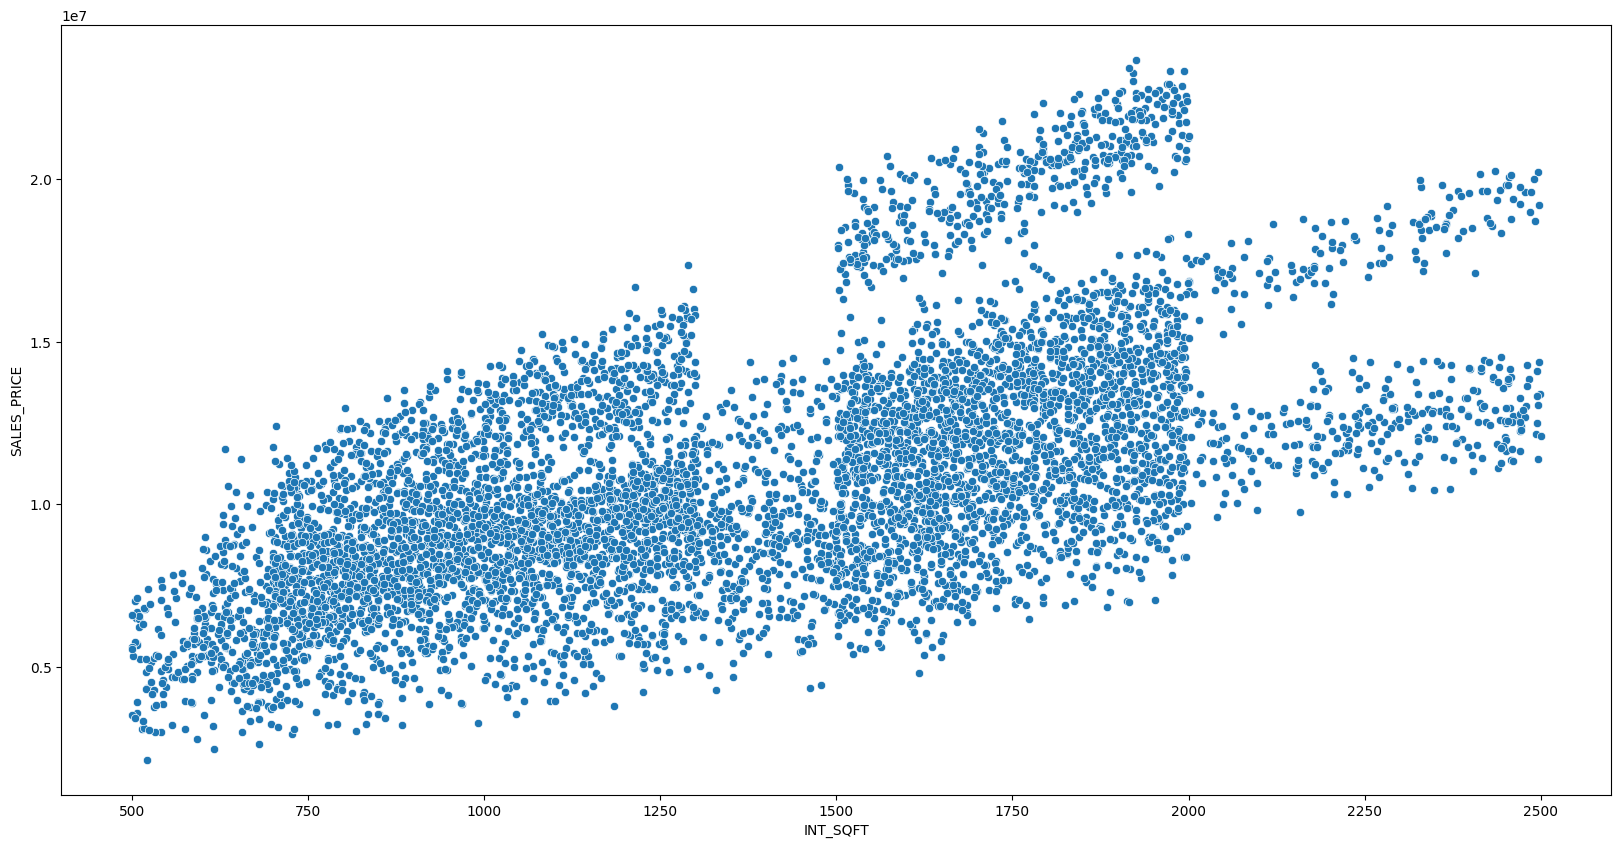

In [16]:

plt.figure(figsize=(20,10))
sns.scatterplot(x = df['INT_SQFT'],y = df['SALES_PRICE'])


<p>We can clearly infer that houses with a sqft of 2000 have the highest sales price.</p>

Text(0, 0.5, 'Sales Price')

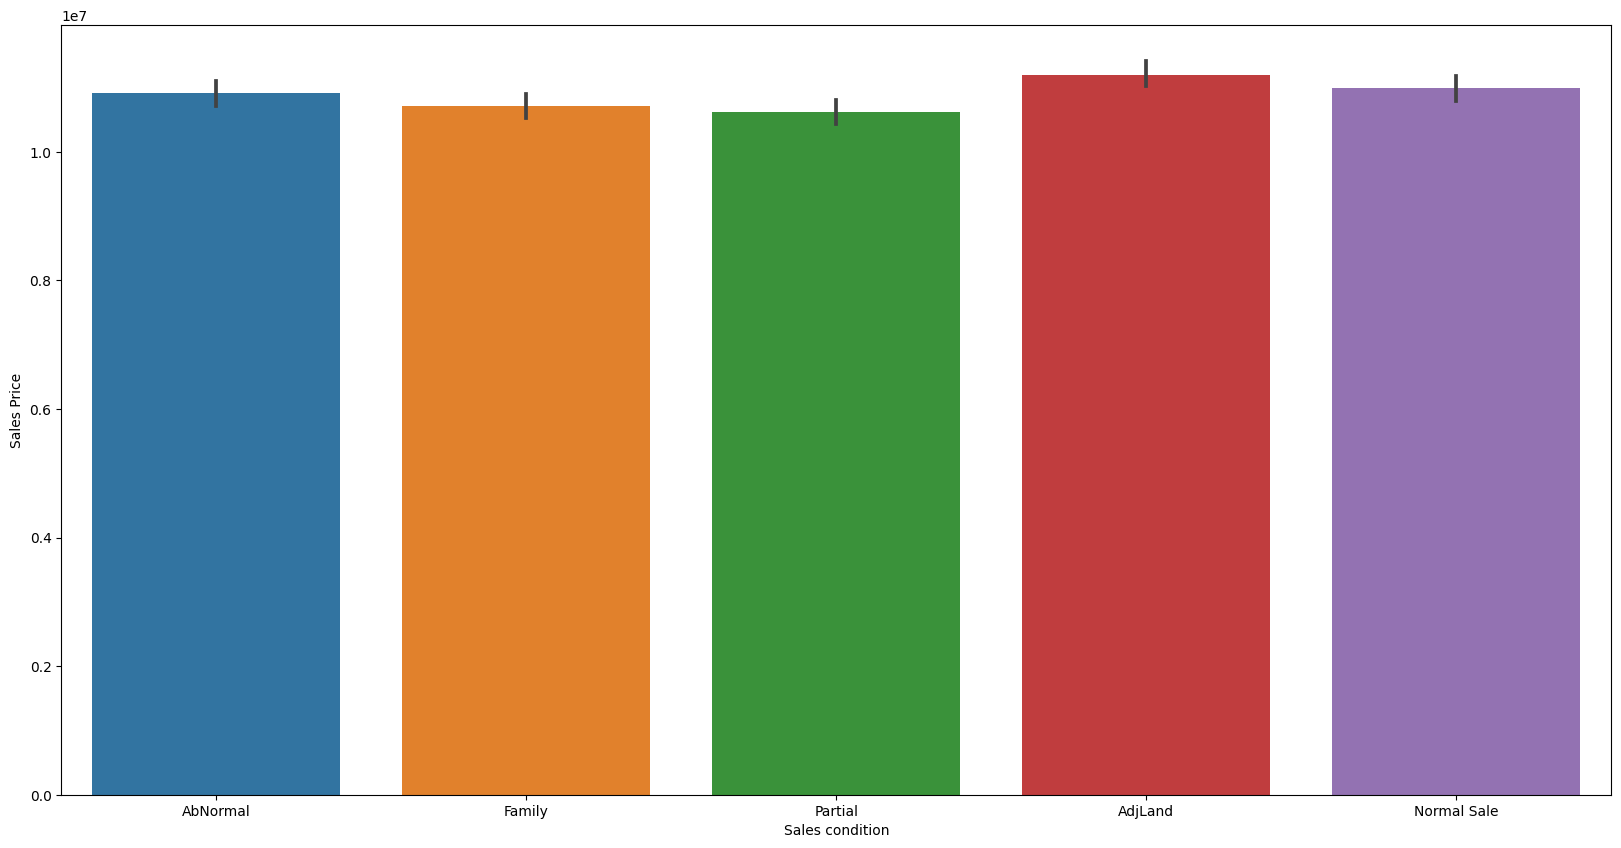

In [17]:
import warnings
warnings.filterwarnings('ignore')
to_replace = {'Ab Normal': 'AbNormal', 'Adj Land': 'AdjLand', 'Partiall': 'Partial','PartiaLl':'Partial'}
df['SALE_COND'].replace(to_replace, inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'])
plt.xlabel("Sales condition")
plt.ylabel("Sales Price")

<p>The sales condition of the houses does not affect our sales price much; all are almost equal except the partial sales condition of the houses, which differs by a few margins. </p>

Text(0, 0.5, 'Sales price')

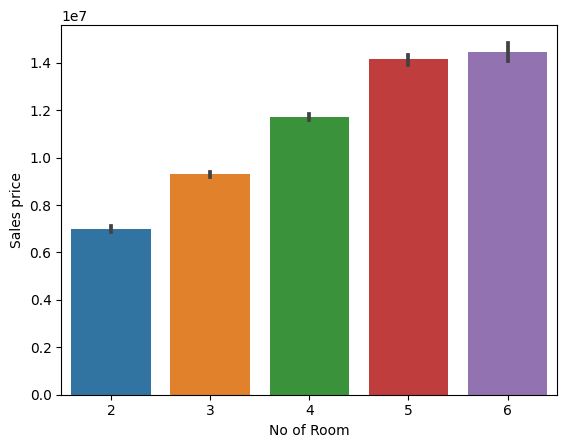

In [18]:
sns.barplot(x = df['N_ROOM'], y = df['SALES_PRICE'])
plt.xlabel("No of Room")
plt.ylabel("Sales price")

<p>Houses with 6 rooms have higher Sales Price</p>

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

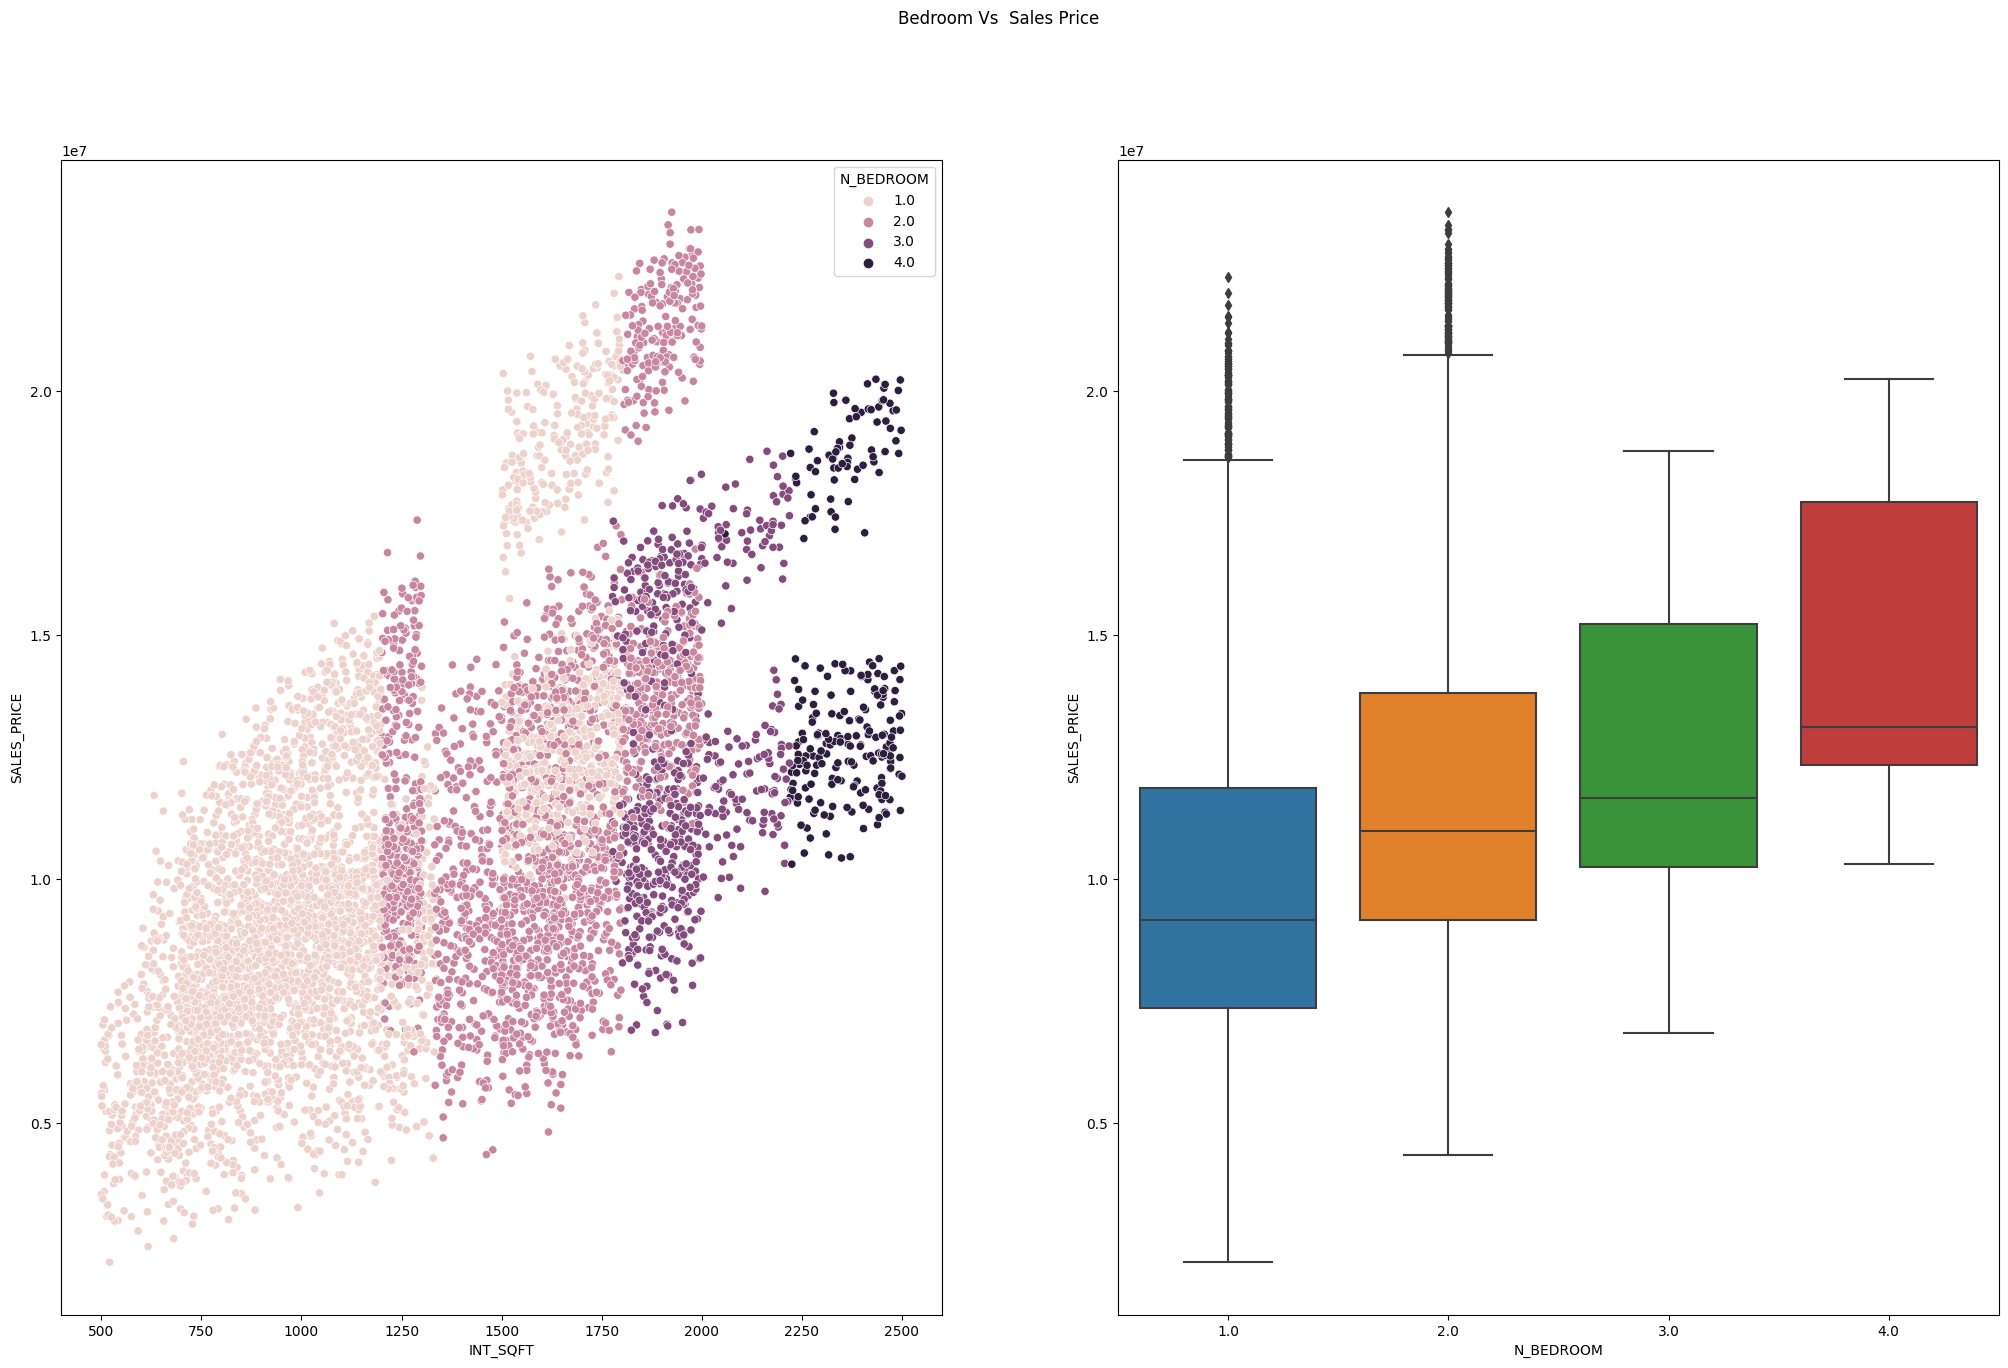

In [19]:
fig,(ax,ax1) = plt.subplots(nrows = 1,ncols = 2,figsize = (25,15))
fig.suptitle("Bedroom Vs  Sales Price")
sns.scatterplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],hue='N_BEDROOM',data=df,ax=ax)
sns.boxplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],ax=ax1)

Text(0, 0.5, 'Sales Price')

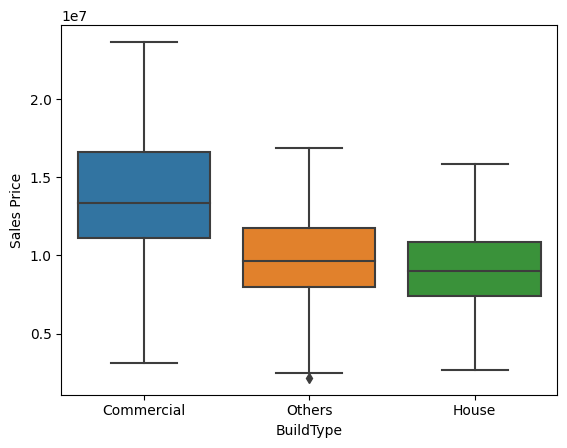

In [20]:
sns.boxplot(x = df['BUILDTYPE'],y = df['SALES_PRICE'])
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


<p>Commercial Houses have the highest Sales price</p>

Text(0, 0.5, 'Sales Price')

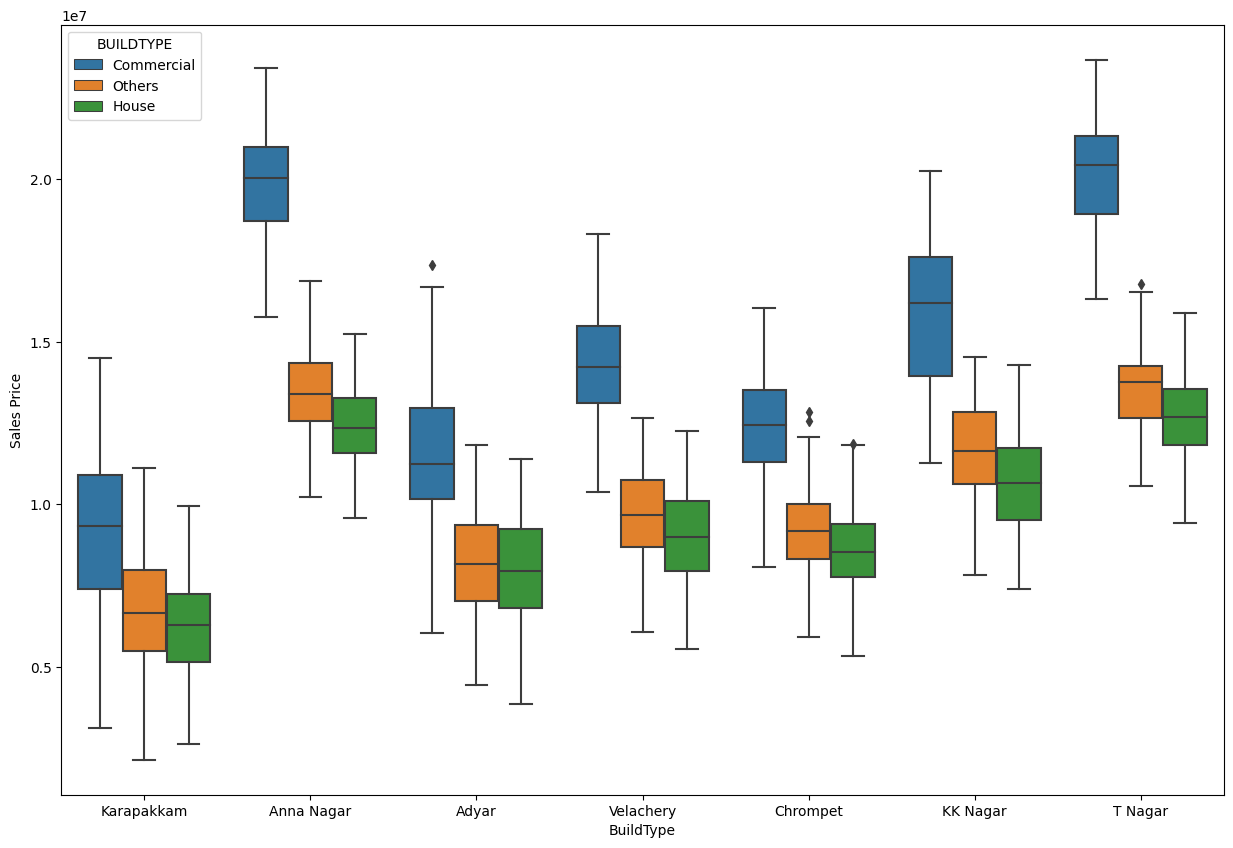

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],hue='BUILDTYPE',data=df)
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


<p>Commercial build Houses have higher Sales price compared to others </p>
<p>T Nagar has the highest sales price, with commercial plots accounting for the highest prices.</p>

In [22]:
df = df.drop(['PRT_ID','DATE_SALE','DIST_MAINROAD','SALE_COND','DATE_BUILD','STREET','MZZONE','STREET'],axis=1)

<p> Dropping the Columns which does not help in predicting our sales price </p>

In [23]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

Text(0, 0.5, 'Sales price')

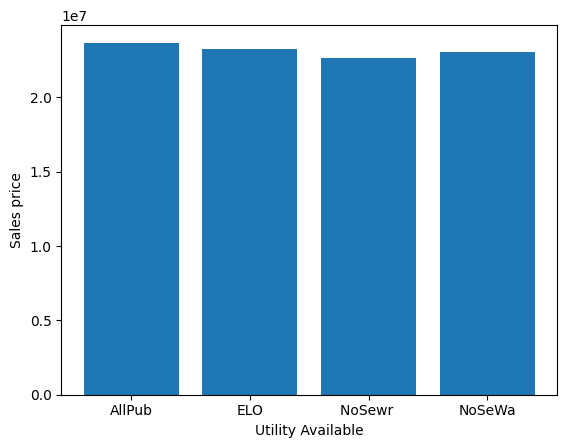

In [24]:
df.UTILITY_AVAIL.replace(to_replace='All Pub',value='AllPub',inplace=True)
plt.bar(df['UTILITY_AVAIL'],df['SALES_PRICE'])
plt.xlabel('Utility Available')
plt.ylabel("Sales price")
#No Much difference

<p>The Sales Price are not drastically changing according to the Utility Available in that Area </p>

In [25]:
df = df.drop(['UTILITY_AVAIL'],axis=1)
value = {'Noo':'No'}
df['PARK_FACIL'] = df['PARK_FACIL'].replace(value)

<Axes: xlabel='SALES_PRICE', ylabel='PARK_FACIL'>

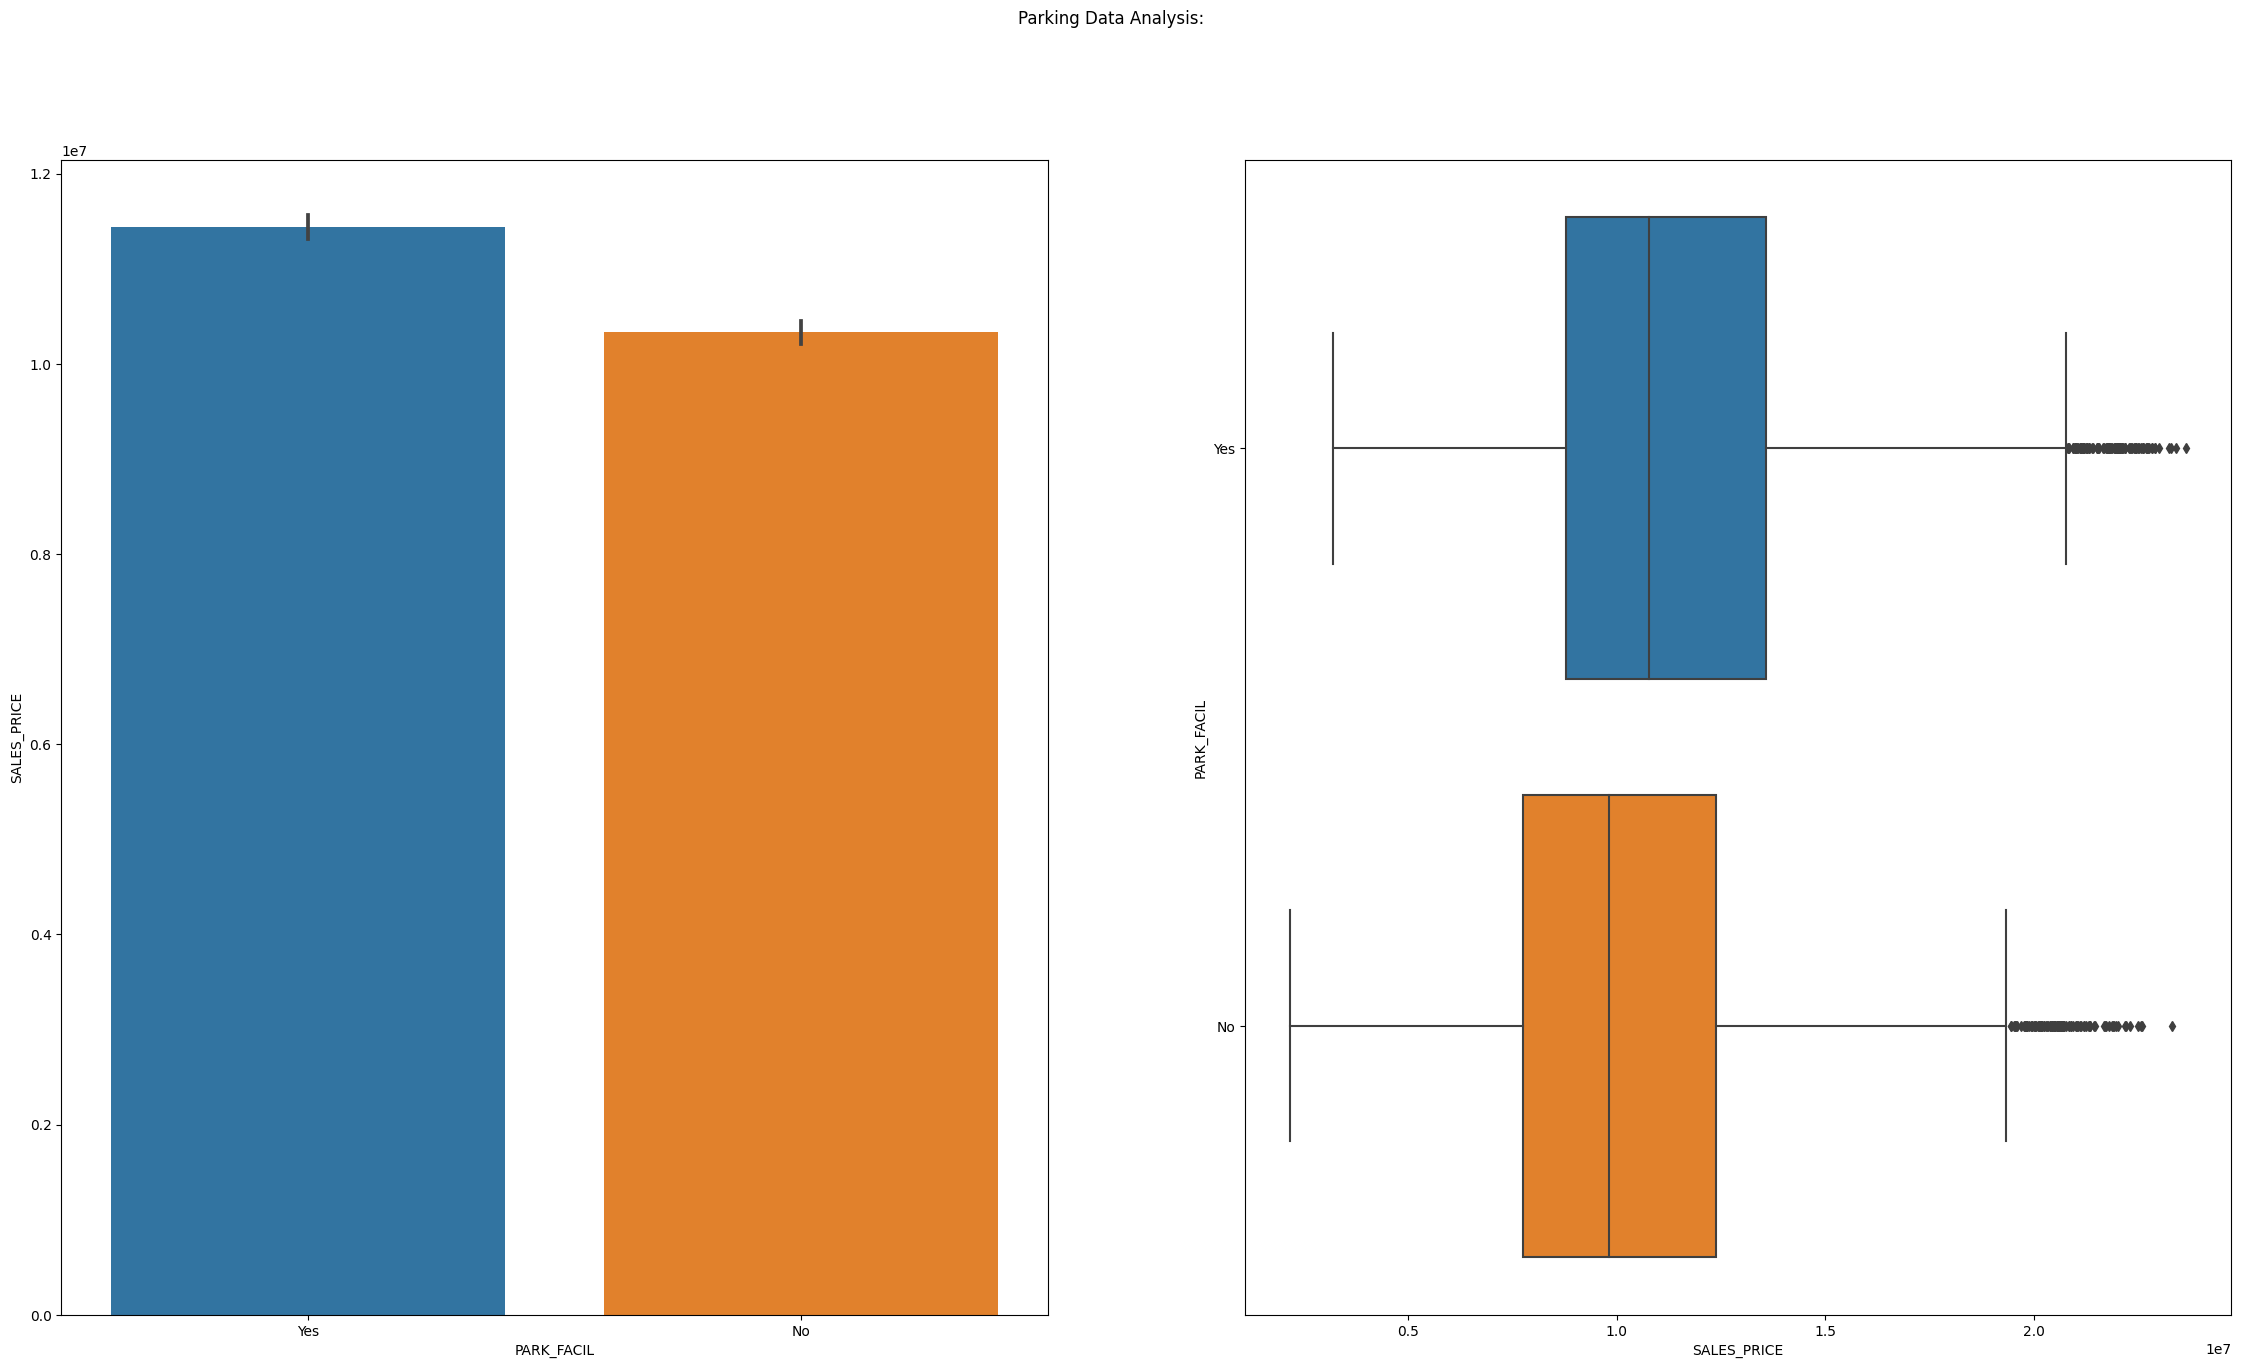

In [26]:
fig,(ax,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(28,15))
fig.suptitle("Parking Data Analysis:")
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],ax=ax)
sns.boxplot(y=df['PARK_FACIL'],x=df['SALES_PRICE'],ax=ax1,orient="h")

<h1>Predicting Outliers</h1>

<p> Formula = ( Sqft / No_of_Bedrooms ) < 400 <p>
<p> One Bedroom houses require atleast 400 sqft </p>
<p> With the above mentioned methodology we can predict which datas are outliers<p>
<p style="font-weight:bold"> Sqft --> 500 and N_Bedroom --> 2 not possible </p>

In [27]:
df[df['INT_SQFT']/df['N_BEDROOM']<400]

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE


**No outliers Found based on the Sqft/Bedroom method**

<h3>Detecting Outliers by Z-score based on Sales_Price <br><br>
    House Price > Mean-3*std & House Price < Mean+3*std </h3>
  

In [28]:
#Outlier based on Sales Price
def outlier(df):
    new = pd.DataFrame()
    
    for key,subdf in df.groupby('AREA'):
        mean = subdf['SALES_PRICE'].mean()
        std = subdf['SALES_PRICE'].std()
        out = subdf[(subdf['SALES_PRICE']>mean-3*std) & (subdf['SALES_PRICE']<mean+3*std)]
        new = pd.concat([new,out],ignore_index=True)
    return new  

new_df = outlier(df)
new_df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE
0,Adyar,909,1.0,1.0,3,Yes,Commercial,421094,92114,13159200
1,Adyar,1056,1.0,1.0,3,Yes,Others,319141,37546,9386490
2,Adyar,1136,1.0,1.0,3,Yes,Others,323214,49725,8287550
3,Adyar,1130,1.0,1.0,3,Yes,Commercial,468417,53533,13383350
4,Adyar,730,1.0,1.0,2,Yes,House,265449,53090,8848285
...,...,...,...,...,...,...,...,...,...,...
7045,Velachery,1907,3.0,2.0,5,No,Commercial,420760,210380,14025340
7046,Velachery,1941,3.0,2.0,5,Yes,House,320289,141304,9420260
7047,Velachery,1897,3.0,2.0,5,Yes,Others,346191,205551,10818480
7048,Velachery,1614,2.0,1.0,4,No,House,317354,167028,8351410


**Let us evaluate our dataset with(df) and without outliers(new_df)**

In [29]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,1.636621,1.213152,3.686650,376791.852608,140994.273384,1.088801e+07
std,457.860850,0.803633,0.409563,1.020011,143109.581793,78774.465963,3.769081e+06
min,500.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,1.000000,1.000000,3.000000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,1.000000,1.000000,4.000000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,2.000000,1.000000,4.000000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07


In [30]:
new_df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7.050000e+03
mean,1381.271489,1.636312,1.212482,3.686383,376622.544823,140923.366525,1.088400e+07
std,458.026264,0.803905,0.409093,1.020404,143048.959746,78760.073601,3.767985e+06
min,500.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,1.000000,1.000000,3.000000,272074.750000,84171.500000,8.264120e+06
50%,1369.500000,1.000000,1.000000,4.000000,349221.500000,127595.500000,1.031454e+07
75%,1744.000000,2.000000,1.000000,4.000000,450881.250000,184243.000000,1.297046e+07
max,2500.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07


**As we can clearly see the new_df (without outliers dataset) does not have much difference with the df(outlier dataset), so we can safely ignore the outliers and we can continue using our df dataset.**

**Note:** This six points may contain some useful Information, Incase if these 6 points affected our mean and standard deviation at higher level then we can remove those outliers.
Remember, removing the outliers depends on the problem you are tackling, and no of outliers present, in some cases outliers may inlude some important information.

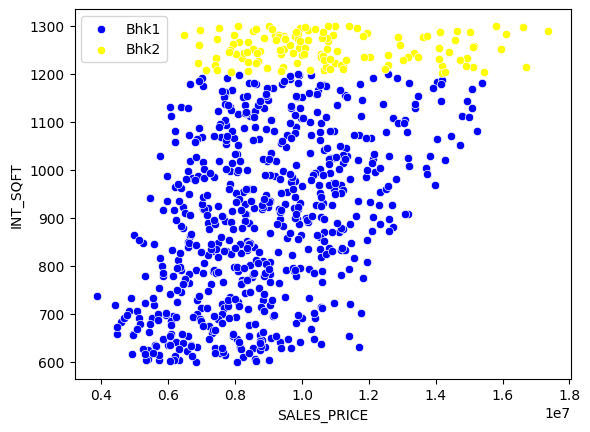

In [31]:
def price_difference(location):
    bhk1 = df[(df['AREA']== location) & (df['N_BEDROOM']==1)]
    bhk2 = df[(df['AREA']== location) & (df['N_BEDROOM']==2)]
    sns.scatterplot(x = bhk1['SALES_PRICE'],y = bhk1['INT_SQFT'],color='blue')
    sns.scatterplot(x = bhk2['SALES_PRICE'],y = bhk2['INT_SQFT'],color='yellow')
    plt.legend(labels=['Bhk1','Bhk2'])

price_difference("Adyar")

<p> From this we can clearly see that in Area Adyar prices of 2 Bedroom Houses are higher </p>

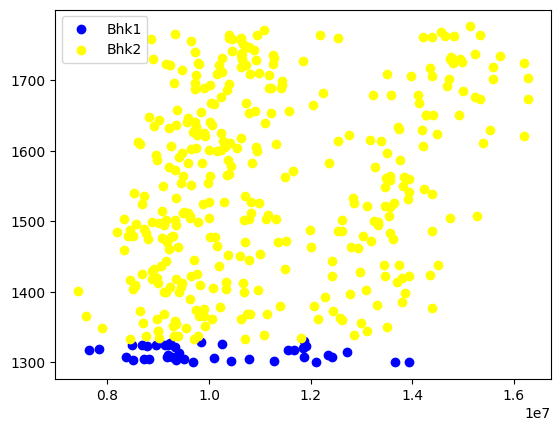

In [32]:
def price_difference(location):
    bhk1 = df[(df['AREA']== location) & (df['N_BEDROOM']==1)]
    bhk2 = df[(df['AREA']== location) & (df['N_BEDROOM']==2)]
    plt.scatter(bhk1['SALES_PRICE'],bhk1['INT_SQFT'],color='blue')
    plt.scatter(bhk2['SALES_PRICE'],bhk2['INT_SQFT'],color='yellow')
    plt.legend(labels=['Bhk1','Bhk2'])

price_difference("KK Nagar")

<p> We compare the same mentioned above in KK Nagar Area </p>

In [33]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,1,1,3,Yes,Commercial,380000,144400,7600000
1,Anna Nagar,1986,2,1,5,No,Commercial,760122,304049,21717770
2,Adyar,909,1,1,3,Yes,Commercial,421094,92114,13159200
3,Velachery,1855,3,2,5,No,Others,356321,77042,9630290
4,Karapakkam,1226,1,1,3,Yes,Others,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,Others,208767,107060,5353000
7105,Velachery,1897,3,2,5,Yes,Others,346191,205551,10818480
7106,Velachery,1614,2,1,4,No,House,317354,167028,8351410
7107,Karapakkam,787,1,1,2,Yes,Commercial,425350,119098,8507000


<Axes: >

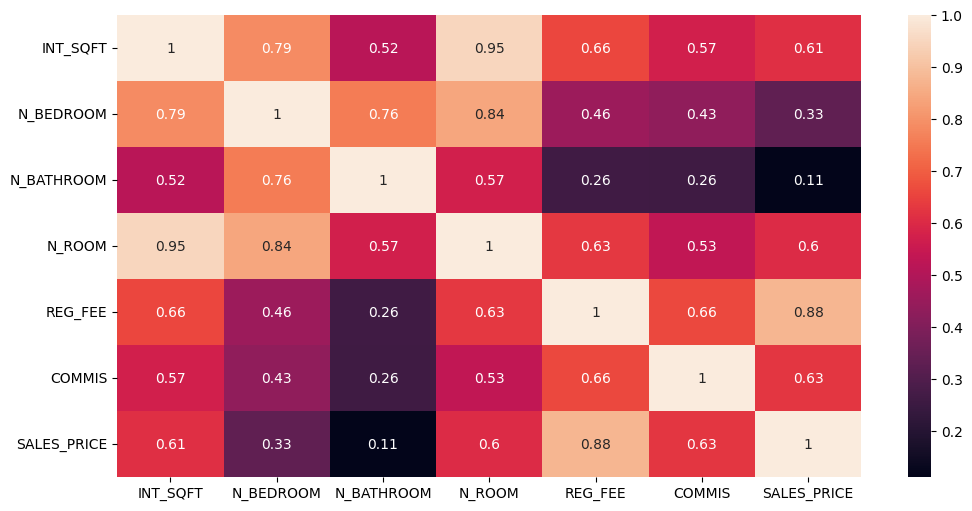

In [34]:
plt.figure(figsize=(12,6))
import seaborn as sn
sn.heatmap(df.corr(numeric_only = True),annot=True)

In [35]:
df.AREA.value_counts()

AREA
Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: count, dtype: int64

<h3> Using pd.get_dummies to convert our Areas to numerical values </h3>

In [36]:
#Convert into numeric values
from sklearn.preprocessing import LabelEncoder
new = pd.DataFrame()
le = LabelEncoder()
new = pd.get_dummies(df['AREA'],dtype=int)

In [37]:
new

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0
7105,0,0,0,0,0,0,1
7106,0,0,0,0,0,0,1
7107,0,0,0,0,1,0,0


In [38]:
df_merged = pd.concat([new,df.drop(['AREA','BUILDTYPE'],axis=1)],axis=1)

In [39]:
df_merged

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,REG_FEE,COMMIS,SALES_PRICE
0,0,0,0,0,1,0,0,1004,1,1,3,Yes,380000,144400,7600000
1,0,1,0,0,0,0,0,1986,2,1,5,No,760122,304049,21717770
2,1,0,0,0,0,0,0,909,1,1,3,Yes,421094,92114,13159200
3,0,0,0,0,0,0,1,1855,3,2,5,No,356321,77042,9630290
4,0,0,0,0,1,0,0,1226,1,1,3,Yes,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0,598,1,1,2,No,208767,107060,5353000
7105,0,0,0,0,0,0,1,1897,3,2,5,Yes,346191,205551,10818480
7106,0,0,0,0,0,0,1,1614,2,1,4,No,317354,167028,8351410
7107,0,0,0,0,1,0,0,787,1,1,2,Yes,425350,119098,8507000


In [40]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
le = LabelEncoder()
df_merged['PARK_FACIL'] = le.fit_transform(df['PARK_FACIL'])
df_merged

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,REG_FEE,COMMIS,SALES_PRICE
0,0,0,0,0,1,0,0,1004,1,1,3,1,380000,144400,7600000
1,0,1,0,0,0,0,0,1986,2,1,5,0,760122,304049,21717770
2,1,0,0,0,0,0,0,909,1,1,3,1,421094,92114,13159200
3,0,0,0,0,0,0,1,1855,3,2,5,0,356321,77042,9630290
4,0,0,0,0,1,0,0,1226,1,1,3,1,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0,598,1,1,2,0,208767,107060,5353000
7105,0,0,0,0,0,0,1,1897,3,2,5,1,346191,205551,10818480
7106,0,0,0,0,0,0,1,1614,2,1,4,0,317354,167028,8351410
7107,0,0,0,0,1,0,0,787,1,1,2,1,425350,119098,8507000


In [41]:
df_merged.shape

(7056, 15)

<h3>Scaling the Numeric Values</h3>

In [42]:
input = df_merged.drop(['SALES_PRICE'],axis=1)
output = df[['SALES_PRICE']]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
input['COMMIS'] = mms.fit_transform(input[['COMMIS']])
input['REG_FEE'] = mms.fit_transform(input[['REG_FEE']])




In [43]:
import sys
!{sys.executable} -m pip install xgboost

In [44]:
df['REG_FEE'] = mms.fit_transform(df[['REG_FEE']])
df['COMMIS'] = mms.fit_transform(df[['COMMIS']]) 
df['SALES_PRICE'] = mms.fit_transform(df[['SALES_PRICE']])
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,1,1,3,Yes,Commercial,0.338345,0.284175,0.253045
1,Anna Nagar,1986,2,1,5,No,Commercial,0.754806,0.609756,0.909366
2,Adyar,909,1,1,3,Yes,Commercial,0.383368,0.177545,0.511487
3,Velachery,1855,3,2,5,No,Others,0.312403,0.146807,0.347432
4,Karapakkam,1226,1,1,3,Yes,Others,0.181675,0.140732,0.244038
...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,Others,0.150743,0.208025,0.148585
7105,Velachery,1897,3,2,5,Yes,Others,0.301304,0.408883,0.402669
7106,Velachery,1614,2,1,4,No,House,0.269711,0.330321,0.287978
7107,Karapakkam,787,1,1,2,Yes,Commercial,0.388031,0.232575,0.295211


In [45]:
output

,SALES_PRICE
0,7600000
1,21717770
2,13159200
3,9630290
4,7406250
...,...
7104,5353000
7105,10818480
7106,8351410
7107,8507000


<h1>Model Selection</h1>

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor as xg_boost
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from time import time
rf = RandomForestRegressor()

We will be trying these models
* Linear Regression
* XGBoost
* Decision Trees
* ExtraTree Regressor

**Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=2)

<h3>Linear Regression Model</h3>

In [48]:
start = time()
regressor = LinearRegression()
model_lr = regressor.fit(x_train, y_train)
end = time()
reg_score = model_lr.score(x_test,y_test)
train_time_linear_reg = end - start
reg_score

0.8890347033012427

**Using Repeated K Fold Method**

In [49]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=15,n_repeats=2,random_state=1)

In [50]:
l=[]
regressor = LinearRegression()
for train_idx,test_idx in cv.split(input):
    x_train,x_test = input.iloc[train_idx],input.iloc[test_idx]
    y_train,y_test = output.iloc[train_idx],output.iloc[test_idx]
    model_lr = regressor.fit(x_train, y_train)
    score = model_lr.score(x_test,y_test)
    l.append(score)
    

In [51]:
from statistics import mean
mean(l)

0.8916793050085752

**Observation:**

We get around 93.76% accuracy using linear regression

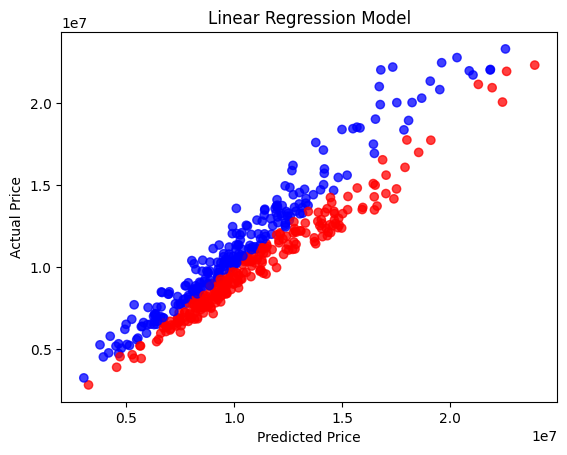

In [52]:
import numpy as np
y_pred = model_lr.predict(x_test)
color = np.where(y_pred[:, 0] > y_test['SALES_PRICE'], 'red', 'blue')
plt.scatter(y_pred,y_test,alpha=0.75,color=color)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


In [53]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.8866155682853255


<h1>Decision Tree Regression Model</h1>

In [54]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(rf,x_train,y_train,cv=kf)

In [55]:
cs.mean()

0.9151313743716416

In [56]:
start = time()
rr = RandomForestRegressor(n_estimators=400).fit(x_train,y_train)
end = time()
train_time_rf_reg = end - start
rf_pred = rr.predict(x_test)
rf_reg_score = rr.score(x_test,y_test)
rf_reg_score

0.919995765749857

<Axes: >

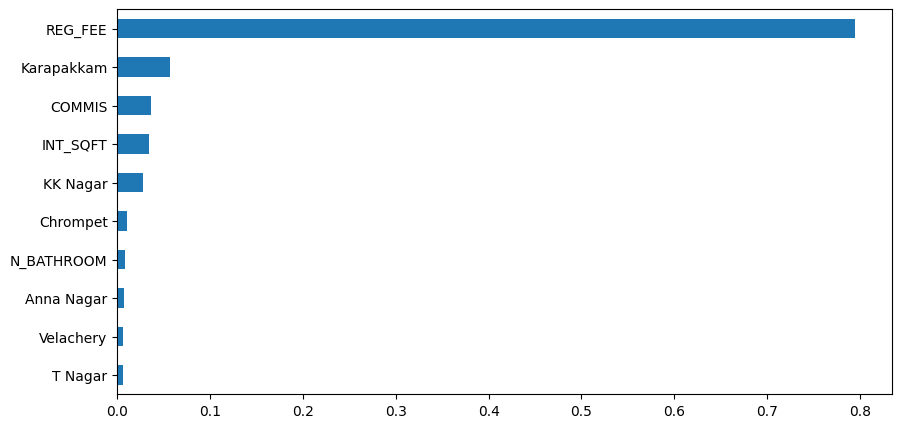

In [57]:
feat_importances = pd.Series(rr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

<h1>XGBoost</h1>

In [58]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(xg_boost(),x_train,y_train,cv=kf)

In [59]:
cs.mean()

0.9093294266058836

In [60]:
start = time()
xx = xg_boost().fit(x_train,y_train)
end = time()
train_time_xgb_reg = end - start
xgb_reg_pred = xx.predict(x_test)
xgb_score = xx.score(x_test,y_test)
xgb_score

0.9140445853107142

<Axes: >

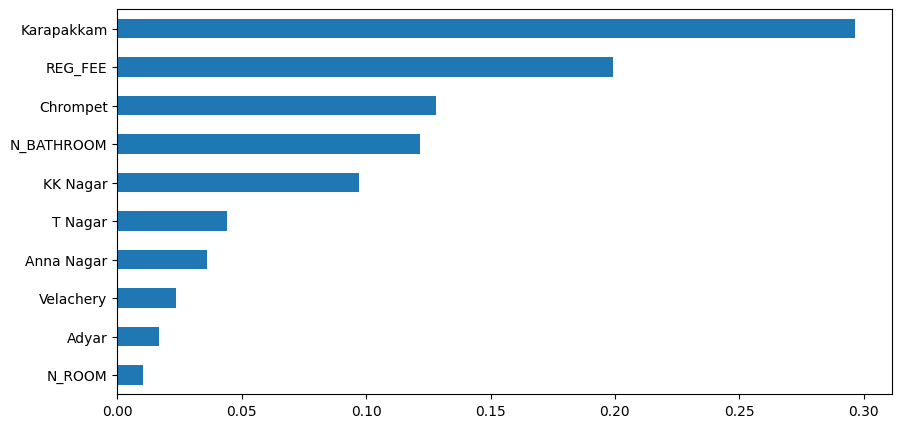

In [61]:
feat_importances = pd.Series(xx.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

Important Features considered

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
start = time()
model.fit(x_train,y_train)
end = time()
train_time_extrareg = end - start
extra_regressor = model.score(x_test,y_test)
extra_regressor
# feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
# feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))


0.9165890653725229

In [63]:
models_cross = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor','XGBoost Regressor','Extra Regressor'],
    'Score': [reg_score,rf_reg_score,xgb_score,extra_regressor],
})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest Regressor,0.919996
3,Extra Regressor,0.916589
2,XGBoost Regressor,0.914045
0,Linear Regression,0.889035


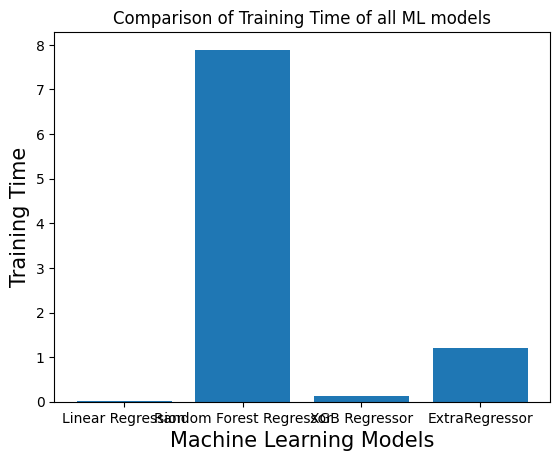

In [64]:
import numpy as np
model = ['Linear Regression','Random Forest Regressor', 'XGB Regressor','ExtraRegressor']
Train_Time = [
    train_time_linear_reg,
    train_time_rf_reg,
    train_time_xgb_reg,  
    train_time_extrareg
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()